<a href="https://colab.research.google.com/github/ahmer-cs/Ahmer-Waqar/blob/master/Copy_of_BleedAi(Assignment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DESCRIPTION

This task is done to provide the most dominant color of the image so for that my code basically depends on two part 1st one will give your the hex code for the most dominant color and the second part is consist of a GUI of all those colors showing the percentage of each color present in a pic and it will also show you the proportions of them.

## Importing Libraries

 - **numpy** : OpenCV uses Numpy for numerical operation. Hence Numpy is used to align input with the respective data type
 
 - **cv2** : OpenCV used for image processing
 
 - **imutils** :  Useful utilities for image processing
 
 - **matplotlib** :  Normally used as a graph plotting lirbary , but we will use it show inline images since "cv2.imshow" doesn't work on collab

 - **scipy** provides more utility functions for optimization, stats and signal processing. Like NumPy, SciPy is open source so we can use it freely.

- **binascii.hexlify()** returns binary as String and not Integer

cluster centres:
 [[167.61248793 171.50949469 201.37431606]
 [ 75.40558912 183.02416918   3.51510574]
 [232.27364358 203.35931804   5.98563157]
 [ 79.87676635  61.54321393 114.29378902]
 [235.61070175  46.30087719  50.11157895]]
most Dominant Color is [232.27364358 203.35931804   5.98563157] (#e8cb05)
Org image shape -->  (183, 275, 3)
After resizing shape -->  (200, 300, 3)
After Flattening shape -->  (60000, 3)


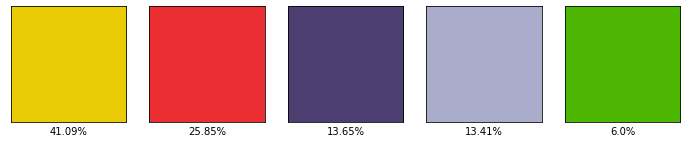

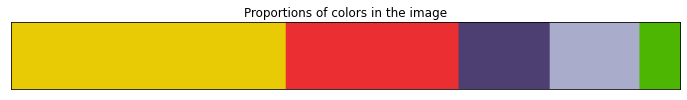

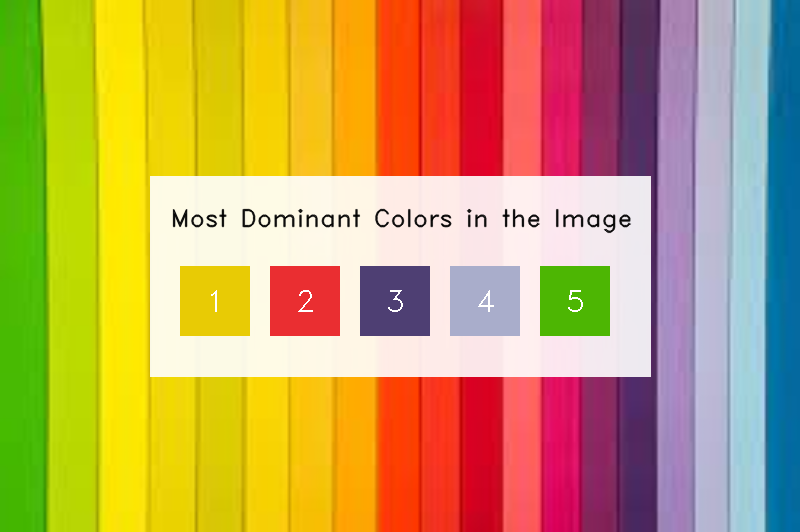

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import imutils
import scipy
import binascii
from PIL import Image

#this is because on 4rth last line I was using cv2.imshow('img',final) but there was an error of cv2.imshow() is disabled in colab,so I used alternative of it.
from google.colab.patches import cv2_imshow

clusters = 5 # try changing it  
##########################################################################################

im = Image.open('colors.jpg')
im = im.resize((150, 150)) 

# Making an array for the images
arr = np.asarray(im)
shape = arr.shape
ar = arr.reshape(np.product(shape[:2]), shape[2]).astype(float)
codes, dist = scipy.cluster.vq.kmeans(ar, clusters)
print('cluster centres:\n', codes)

# assign codes
vecs, dist = scipy.cluster.vq.vq(ar, codes)
counts, bins = np.histogram(vecs, len(codes))  

# find most dominant
index_max = np.argmax(counts)
peak = codes[index_max]
colour = binascii.hexlify(bytearray(int(c) for c in peak)).decode('ascii')
print('most Dominant Color is %s (#%s)' % (peak, colour))


######################################################################################
img = cv2.imread('colors.jpg')

# Making a copy of original data
org_img = img.copy()

# Original Image
print('Org image shape --> ',img.shape)
img = imutils.resize(img,height=200)

# After resizing the height to most 200,
print('After resizing shape --> ',img.shape)
flat_img = np.reshape(img,(-1,3))


# Flattening the image to be more specific with the details cause multidimensional arrays are more memory consuming
print('After Flattening shape --> ',flat_img.shape)

#Using K-Means algorithm because its a good approach for image classification and to make clusters out of your data 
kmeans = KMeans(n_clusters=clusters,random_state=0)

# Fitting kmeans to our flatten data
kmeans.fit(flat_img)

# Making cluster centered point so that each point is directed towards its similar area
colors = np.array(kmeans.cluster_centers_,dtype='uint')
percentages = (np.unique(kmeans.labels_,return_counts=True)[1])/flat_img.shape[0]

# Here I have used zip to make parallel iteration possible and storing it in a common variable p_and_c
p_and_c = zip(percentages,colors)

# Sorted and reversed
p_and_c = sorted(p_and_c,reverse=True)

# Defining each block of color and assigning it value to 1
block = np.ones((50,50,3),dtype='uint')
plt.figure(figsize=(12,8))

# Performing iteration for the no of clusters
for i in range(clusters):
    plt.subplot(1,clusters,i+1)

# Done this to convert bgr(opencv) to rgb(matplotlib) 
    block[:] = p_and_c[i][1][::-1]
    plt.imshow(block)
    plt.xticks([])
    plt.yticks([])

# Labeling with the intensity of colors in %
    plt.xlabel(str(round(p_and_c[i][0]*100,2))+'%')

def proportion_Bar():
  bar = np.ones((50,500,3),dtype='uint')
  plt.figure(figsize=(12,8))
  plt.title('Proportions of colors in the image')
  start = 0
  i = 1
  for p,c in p_and_c:
    end = start+int(p*bar.shape[1])
    if i==clusters:
      bar[:,start:] = c[::-1]
    else:
      bar[:,start:end] = c[::-1]
    start = end
    i+=1
  plt.imshow(bar)
  plt.xticks([])
  plt.yticks([])

def all_dominant_Colors():
  rows = 800
  cols = int((org_img.shape[0]/org_img.shape[1])*rows)
  img = cv2.resize(org_img,dsize=(rows,cols),interpolation=cv2.INTER_LINEAR)
  copy = img.copy()
  cv2.rectangle(copy,(rows//2-250,cols//2-90),(rows//2+250,cols//2+110),(255,255,255),-1)

# Here I have added weight to our Sources of images by defining the values of Alpha ,Beta and Gama
  final = cv2.addWeighted(img,0.1,copy,0.9,0)
  cv2.putText(final,'Most Dominant Colors in the Image',(rows//2-230,cols//2-40),cv2.FONT_HERSHEY_DUPLEX,0.8,(0,0,0),1,cv2.LINE_AA)
  start = rows//2-220
  for i in range(5):
    end = start+70
    final[cols//2:cols//2+70,start:end] = p_and_c[i][1]
    cv2.putText(final,str(i+1),(start+25,cols//2+45),cv2.FONT_HERSHEY_DUPLEX,1,(255,255,255),1)
    start = end+20
  plt.show()
  cv2_imshow(final)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
  cv2.imwrite('output1.png',final)
  plt.show()

#Calling methods
proportion_Bar()
all_dominant_Colors()